In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, sympy as sym
from sympy import lambdify

In [2]:
m,x,b,y,yhat = sym.symbols('m x b y \hat{y}')

Define the function $y(x,m,b)$ we want to fit.
$$
y = mx +  b, \,\,\, \hat{y} = \text{data}
\\
Error = L = (\hat{y}-y)^2 = (\hat{y}-(mx+b))^2
\\
\frac{dL}{dm} =  -2 x  (\hat{y}-(mx+b))
$$

In [3]:
y = b + m * x 
L = (yhat - y)**2 # loss function
dLdm = sym.diff(L, m)
dLdb = sym.diff(L, b)

Convert from symbolic to numerical functions.

In [4]:
dLdm_lamb  = lambdify([m,x,b,yhat], dLdm)
dLdb_lamb  = lambdify([m,x,b,yhat], dLdb)

Generating experimental data

In [5]:
x_data = np.linspace(0,10,11)
y_data = 2*x_data

$$
\frac{dL}{dm} = \frac{1}{N}\sum_i^N\frac{\partial }{\partial m}(\hat{y}_i - (mx_i+b))^2
$$

In [6]:
def descend(x_data, y_data, m=0, b=0, rate=0.001, iterations=100):
    for i in range(iterations):
        N = len(x_data)
        # get the sum of ther errors for all data points
        dLdm = sum([dLdm_lamb(m,xi,b,data_point) for xi, data_point in zip(x_data, y_data)])/N
        dLdb = sum([dLdb_lamb(m,xi,b,data_point) for xi, data_point in zip(x_data, y_data)])/N
        #update the parameters according to the gradient and the learning rate
        m = m - rate * dLdm
        b = b - rate * dLdb
    return m, b

In [7]:
m, b = descend(x_data, y_data, m=0, b=0, rate = 0.01, iterations=100)

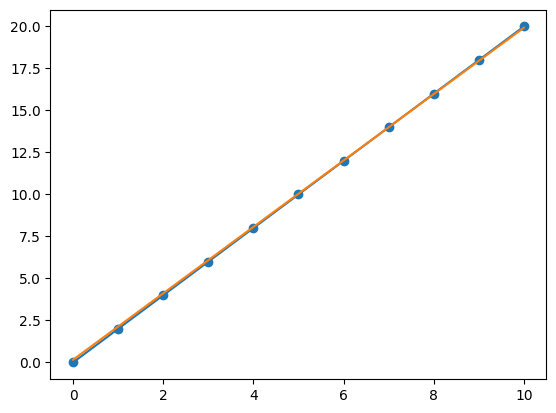

In [8]:
plt.scatter(x_data, y_data)
plt.plot(x_data, y_data,  m*x_data+b)